# Surgical Trends, Case Mix, and Diagnosis Burden Analysis (2022–2025)

## 1. Project Overview

Surgical services consume a significant proportion of hospital resources and are a key indicator of population health needs. Understanding surgical case mix, trends over time, and diagnosis burden is essential for clinical planning, workforce allocation, infrastructure investment, and policy decision-making.

This project analyzes theatre data from 2022 to 2025 to explore surgical volume trends, demographic patterns, emergency versus elective workload, specialty distribution, diagnosis burden, and anesthesia utilization.

The analysis is intended to generate actionable insights for hospital leadership, clinicians, and health system pla

## 2. Objectives

The objectives of this analysis are to:

1. Describe overall surgical volume and trends from 2022 to 2025.
2. Analyze the distribution of surgical cases by age group and sex.
3. Examine the balance between elective and emergency surgeries.
4. Assess specialty-specific surgical workload.
5. Explore diagnosis and procedure burden across different population groups.
6. Analyze anesthesia utilization patterns by specialty and patient demographics.
7. Identify key trends and patterns that can inform hospital planning and resource a

## 3. Data Description

The dataset contains theatre records from 2022 to 2025. Each record represents a single surgical case.

### Key Variables

- **MONTH**: Date of surgery
- **AGE**: Raw age entry as recorded in theatre logs
- **SEX**: Patient sex
- **TYPE_OF_SURGERY**: Elective (EL) or Emergency (EM)
- **SPECIALTY**: Surgical specialty
- **DIAGNOSIS**: Primary diagnosis
- **OPERATIONS**: Surgical procedure performed
- **ANESTHESIA**: Type of anesthesia used

### Engineered Variables

- **YEAR**: Year of surgery
- **MONTH_NAME**: Calendar month name
- **YEAR_MONTH**: Year–month combination for trend analysis
- **AGE_YEARS**: Cleaned numeric age in years
- **AGE_GROUP**: Clinically meaningful age categories
- **ANESTHESIA_IMPUTED**: Flag indicating whether anesthesia type was inferre

## 4. Data Preparation Summary

Raw theatre data required extensive cleaning due to inconsistent age entries, variable column naming, and missing anesthesia records.

Key preparation steps included:
- Standardizing column names and categorical values
- Converting mixed-format age entries into numeric age in years
- Creating clinically meaningful age groups
- Engineering time-based variables for trend analysis
- Applying clinically informed rules to handle missing anesthesia records
- Building a reproducible data cleaning pipeline applied consistently across all years

The final master dataset contains cleaned and standardized records suitable for exploratory and descripti

## 5. Exploratory Data Analysis (EDA)

Exploratory Data Analysis is conducted in three stages:

1. **Univariate Analysis** – Understanding individual variable distributions  
2. **Bivariate Analysis** – Exploring relationships between two variables  
3. **Multivariate and Trend Analysis** – Examining patterns across time and multiple dime

## 6. Univariate Analysis

This section explores the distribution of individual variables to understand the overall surgical workload and population characteristic
### Surgical Volume by Year
### Monthly Surgical Volume Trends
### Distribution of Cases by Sex
### Distribution of Cases by Age Group
### Emergency vs Elective Surgery Distribution
### Surgical Volume by Specialty
### Common Diagnoses
### Common Surgical Procedures
### Anesthesia Uti

## 7. Bivariate Analysis

This section examines relationships between pairs of variables to identify patterns across demographic and clinical dimension
### Age Group by Type of Surgery
### Specialty by Type of Surgery
### Sex Distribution Across Specialties
### Diagnosis Burden by Age Group
### Anesthesia Type by Speci

## 8. Multivariate and Trend Analysis

This section explores how multiple factors interact over time, focusing on evolving patterns in surgical demand and service deliver
### Surgical Trends Over Time by Specialty
### Emergency Surgery Trends Over Time
### Pediatric vs Adult Surgical Trends
### Aging Population and Surgical Deman## 9. Key Findings

This section summarizes the most important insights derived from the analysis, highlighting trends, disparities, and notable patterns observed across the study perio

## 10. Recommendations

Based on the findings, the following recommendations are proposed:

- Strategic allocation of theatre time based on specialty demand
- Strengthening emergency surgical capacity where burden is high
- Planning for age-specific surgical needs
- Optimization of anesthesia and perioperative resources
- Improved data quality and standardization in theatre

## 11. Limitations

- Analysis is based on routinely collected theatre data and may be affected by data entry errors.
- Diagnosis coding is not standardized across all years.
- Some variables (e.g., operating room identifiers) were unavailable for the full study period.
- Anesthesia type was imputed for a subset of records using clinically informed assumpt

## 12. Conclusion

This analysis provides a comprehensive overview of surgical trends, case mix, and diagnosis burden from 2022 to 2025. The findings offer valuable insights for hospital management and health system planning, and demonstrate the value of routine clinical data when systematically cleaned and analyze

## 13. Portfolio Note

This project demonstrates end-to-end health data analytics skills, including data cleaning, feature engineering, exploratory analysis, and insight generation using real-world clinical dat





aords
d.
d
y.
alty

s.
lization

s.
nsions
ve analysis.
d using clinical rules
llocation.


nners.



In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_excel("SURGICAL_MASTER_2022_2025.xlsx")
df.head()


,MONTH,AGE,SEX,TYPE_OF_SURGERY,SPECIALTY,DIAGNOSIS,OPERATIONS,ANESTHESIA,YEAR,MONTH_NAME,YEAR_MONTH,AGE_NUM,AGE_YEARS,AGE_GROUP,ANESTHESIA_IMPUTED
0,2022-01-01,27,MALE,EL,OPHTHA,CORNEAL LACERATION,CORNEAL REPAIR,LA,2022,January,2022-01,27.0,27.0,19–35,False
1,2022-01-01,9,MALE,EL,OPHTHA,CORNEAL PERFORATION,CORNEAL REPAIR,GA,2022,January,2022-01,9.0,9.0,6–12,False
2,2022-01-01,32,FEMALE,EM,GYNAE,RIGHT ECTOPIC PREGNANCY,EXPLORATORY LAPAROTOMY/SALPINGECTOMY,GA,2022,January,2022-01,32.0,32.0,19–35,False
3,2022-01-01,43,MALE,EM,GEN. SURGERY,MULTIPLE FACIAL LACERATION,DEBRIDEMENT/STITCHING,GA,2022,January,2022-01,43.0,43.0,36–60,False
4,2022-01-01,22,MALE,EM,GEN. SURGERY,COMPLICATED APPENDICITS,APPENDICITS,GA,2022,January,2022-01,22.0,22.0,19–35,False


## UNIVARIATE ANALYSIS


### SURGICAL VOLUME BY YEAR
How many surgeries were performed per year (2022–2025)?
Why this question matters

This is the foundation of the entire analysis. It tells us:

Overall surgical workload

Whether volume is increasing, decreasing, or stable

If there are shocks (e.g. post-COVID recovery, strikes, capacity changes)

Every hospital leader will ask this first.

#### Step 1: Confirm the YEAR variable exists

Before analysis, we always confirm the variable we’re about to use.

In [2]:
df["YEAR"].value_counts().sort_index()


2022    16408
2023    16155
2024    14564
2025    15332
Name: YEAR, dtype: int64

value_counts() → counts how many surgeries per year

sort_index() → orders years chronologically (2022 → 2025)

In [3]:
surgeries_per_year = df.groupby("YEAR").size().reset_index(name="TOTAL_SURGERIES")
surgeries_per_year


,YEAR,TOTAL_SURGERIES
0,2022,16408
1,2023,16155
2,2024,14564
3,2025,15332


Explanation (line by line)

groupby("YEAR") → group all records by year

.size() → count rows (each row = one surgery)

reset_index() → turn result back into a DataFrame

name="TOTAL_SURGERIES" → give the count column a meaningful name

This table is:

clean

reusable

dashboard-friendly

####  Step 3: Visualize surgeries per year

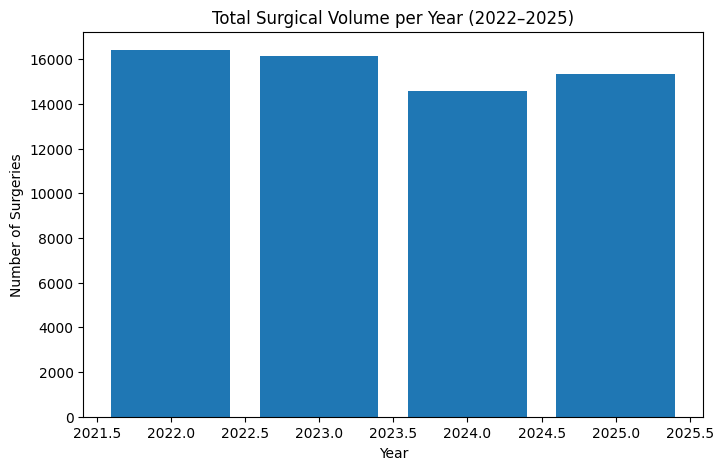

In [4]:
plt.figure(figsize=(8, 5))
plt.bar(
    surgeries_per_year["YEAR"],
    surgeries_per_year["TOTAL_SURGERIES"]
)
plt.title("Total Surgical Volume per Year (2022–2025)")
plt.xlabel("Year")
plt.ylabel("Number of Surgeries")
plt.show()


What this visualization tells you

Height of bars = surgical workload

Easy to compare years

Clear to non-technical audiences

⚠️ We intentionally use a simple bar chart here — no over-styling.

#### Step 4: Interpret the results

### Surgical Volume by Year (2022–2025)

The total number of surgical procedures varied across the study period.  
Surgical volume was highest in 2022 and remained relatively stable in 2023.  
A notable decline in total surgeries was observed in 2024, followed by a partial recovery in 2025.

This pattern suggests a possible disruption to surgical services in 2024, with gradual recovery thereafter.  
Potential contributing factors may include changes in service capacity, staffing levels, infrastructure availability, or broader health system challenges.


#### SURGICAL VOLUME
How does surgical volume change month by month over time?
Why this question matters

Yearly totals tell us how much work was done.
Monthly trends tell us when pressure is highest.

This helps answer:

Are there seasonal peaks?

Were there sudden drops (e.g. strikes, shutdowns)?

Is the 2024 dip spread across the year or concentrated in certain months?

##### Step 1: Aggregate surgeries by YEAR_MONTH

In [5]:
monthly_volume = (
    df.groupby("YEAR_MONTH")
      .size()
      .reset_index(name="TOTAL_SURGERIES")
)

monthly_volume.head()


,YEAR_MONTH,TOTAL_SURGERIES
0,2022-01,1274
1,2022-02,1337
2,2022-03,1586
3,2022-04,1367
4,2022-05,1406


Explanation

groupby("YEAR_MONTH") → groups all surgeries by month (e.g. 2022-01)

.size() → counts surgeries in each month

reset_index() → converts it back to a DataFrame

TOTAL_SURGERIES → clear, descriptive column name

This table is your monthly workload timeline.

##### Step 2: Sort by time (important!)

Even though YEAR_MONTH looks ordered, we must sort it explicitly.

In [6]:
monthly_volume = monthly_volume.sort_values("YEAR_MONTH")


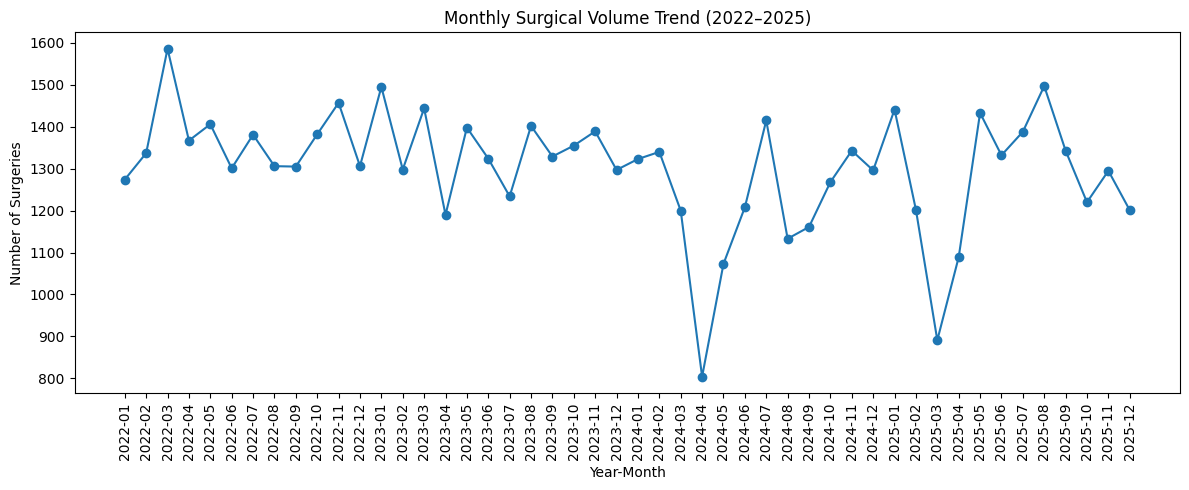

In [7]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 5))
plt.plot(
    monthly_volume["YEAR_MONTH"],
    monthly_volume["TOTAL_SURGERIES"],
    marker="o"
)
plt.xticks(rotation=90)
plt.title("Monthly Surgical Volume Trend (2022–2025)")
plt.xlabel("Year-Month")
plt.ylabel("Number of Surgeries")
plt.tight_layout()
plt.show()


##### Monthly Surgical Volume Trends (2022–2025)

Monthly surgical activity remained relatively stable throughout 2022 and 2023, with most months recording between approximately 1,300 and 1,500 procedures. This pattern suggests consistent theatre utilization and steady surgical demand during this period.

A pronounced and sustained decline in surgical volume was observed in early to mid-2024, with the lowest activity occurring around April 2024. This reduction is not limited to a single month, indicating a broader disruption in surgical services rather than short-term seasonal variation.

From mid-2024 onwards, surgical activity begins to recover, with further improvement observed across 2025. Several months in 2025 approach or exceed pre-2024 levels, suggesting partial restoration of surgical capacity. However, overall activity in 2025 remains variable, indicating that full normalization of surgical services may still be ongoing.


##### SEX DISTRIBUTION

SEX Distribution
What is the distribution of surgical cases by sex?
Why this question matters

Understanding sex distribution helps us:

Describe who is accessing surgical services

Contextualize specialty patterns (e.g. OB/GYN, trauma, urology)

Provide demographic grounding for later analyses

At this stage, we are describing, not explaining.

##### Step 1: Count surgeries by sex

In [8]:
sex_counts = df["SEX"].value_counts()
sex_counts

FEMALE                          33769
MALE                            28675
OTHERS                             13
INTESEX (AMBIGUOS GENITALIA)        1
Name: SEX, dtype: int64

##### Step 2: Convert counts to percentages (very important)

Percentages make interpretation clearer.

In [9]:
sex_percent = df["SEX"].value_counts(normalize=True) * 100
sex_percent.round(1)


FEMALE                          54.1
MALE                            45.9
OTHERS                           0.0
INTESEX (AMBIGUOS GENITALIA)     0.0
Name: SEX, dtype: float64

Why this matters

Raw numbers show volume

Percentages show proportional burden

Easier to communicate to non-technical audience

##### Step 3: Visualize the distribution

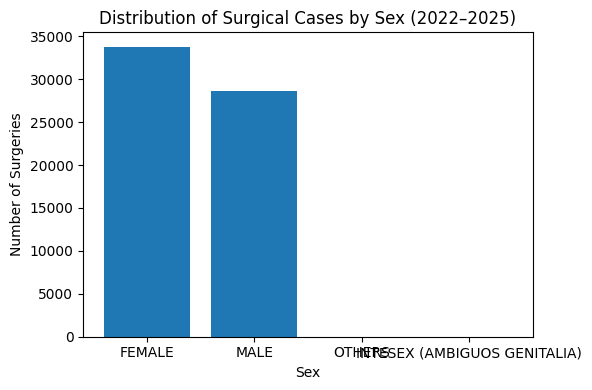

In [10]:
plt.figure(figsize=(6, 4))
plt.bar(sex_counts.index, sex_counts.values)
plt.title("Distribution of Surgical Cases by Sex (2022–2025)")
plt.xlabel("Sex")
plt.ylabel("Number of Surgeries")
plt.tight_layout()
plt.show()

##### Distribution of Surgical Cases by Sex (2022–2025)

Surgical cases were distributed across both female and male patients over the study period.  
Female patients accounted for a higher proportion of surgical procedures compared to male patients, indicating a modest female predominance in overall surgical workload.

This pattern likely reflects the contribution of obstetric and gynecological services in addition to other surgical specialties.  
Cases classified under other sex categories were rare and did not materially affect the overall distribution.


##### AGE-GROUP DISTRIBUTION
AGE_GROUP Distribution
What is the distribution of surgical cases by age group?
Why this question matters

This tells us:

Which age groups consume the most surgical services

Pediatric vs adult vs elderly burden

Signals for workforce planning, theatre time, and equipment needs

This is one of the most actionable insights in hospital analytics.

##### Step 1: Count surgeries by AGE_GROUP

In [11]:
age_group_counts = df["AGE_GROUP"].value_counts().sort_index()
age_group_counts


0–<1      2365
13–18     3188
19–35    23240
1–5       4737
36–60    14894
60+       8513
6–12      4445
Name: AGE_GROUP, dtype: int64

What this does

Counts how many surgeries fall in each age group

sort_index() keeps age groups in logical order (young → old)

##### Step 2: Convert to percentages (very important)

In [12]:
age_group_percent = df["AGE_GROUP"].value_counts(normalize=True).sort_index() * 100
age_group_percent.round(1)


0–<1      3.9
13–18     5.2
19–35    37.9
1–5       7.7
36–60    24.3
60+      13.9
6–12      7.2
Name: AGE_GROUP, dtype: float64

##### Step 3: Visualize AGE_GROUP distribution

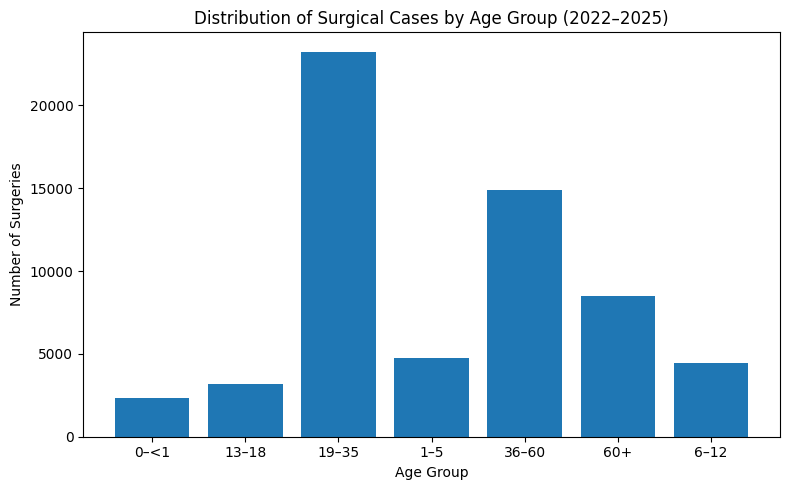

In [13]:
plt.figure(figsize=(8, 5))
plt.bar(age_group_counts.index, age_group_counts.values)
plt.title("Distribution of Surgical Cases by Age Group (2022–2025)")
plt.xlabel("Age Group")
plt.ylabel("Number of Surgeries")
plt.tight_layout()
plt.show()

##### Distribution of Surgical Cases by Age Group (2022–2025)

Surgical workload was unevenly distributed across age groups.  
The highest volume of surgical procedures occurred among young adults aged 19–35 years, indicating that this population group contributes the largest share of surgical demand.

Patients aged 36–60 years formed the second-largest group, reflecting a substantial burden of surgical conditions in mid-life.  
Elderly patients (60 years and above) also accounted for a significant proportion of surgical cases, highlighting the impact of age-related and chronic disease conditions on surgical services.

Pediatric patients, while representing a smaller share of total cases, contributed a clinically important workload, particularly within the 1–5 and 6–12 year age groups.  
Neonates and infants accounted for the smallest proportion of cases but represent a specialized group requiring dedicated surgical and perioperatve care.


#### TYPE OF SURGERY
What is the distribution of surgeries by TYPE_OF_SURGERY (Elective vs Emergency)?

This is one of the most important hospital management metrics.

##### Step 1: Inspect the categories

In [14]:
df["TYPE_OF_SURGERY"].value_counts()


EL    32002
EM    30457
Name: TYPE_OF_SURGERY, dtype: int64

##### Step 2: Count surgeries by type

In [15]:
surgery_type_counts = df["TYPE_OF_SURGERY"].value_counts()
surgery_type_counts


EL    32002
EM    30457
Name: TYPE_OF_SURGERY, dtype: int64

##### Step 3: Convert to percentage

In [16]:
surgery_type_percent = df["TYPE_OF_SURGERY"].value_counts(normalize=True) * 100
surgery_type_percent.round(1)


EL    51.2
EM    48.8
Name: TYPE_OF_SURGERY, dtype: float64

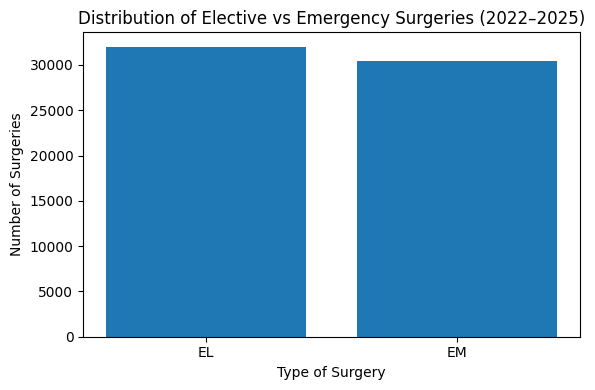

In [17]:
plt.figure(figsize=(6, 4))
plt.bar(surgery_type_counts.index, surgery_type_counts.values)
plt.title("Distribution of Elective vs Emergency Surgeries (2022–2025)")
plt.xlabel("Type of Surgery")
plt.ylabel("Number of Surgeries")
plt.tight_layout()
plt.show()

### Distribution of Elective vs Emergency Surgeries (2022–2025)

Elective and emergency surgeries contributed almost equally to the overall surgical workload during the study period.  
Elective procedures recorded a slightly higher volume than emergency cases, indicating a near-balanced distribution between planned and unplanned surgical care.

The substantial proportion of emergency surgeries highlights the significant demand for urgent and acute surgical services. This balance underscores the need for flexible theatre scheduling, adequate emergency preparedness, and efficient allocation of surgical teams to manage both planned and unplanned cases effectively.


### SPECIALTY DISTRIBUTION 
Specialty frames diagnosis, procedure, and anesthesia patterns

Everything else builds on it

#### Step 1: Count cases by specialty

In [18]:
specialty_counts = df["SPECIALTY"].value_counts()
specialty_counts

OBSTETRICS                    7747
ORTHOPAEDIC                   6668
OBS                           5952
ORTHO                         5340
GENERAL SURGERY               3698
NEUROSURGERY                  3175
NEURO                         2968
GEN. SURGERY                  2801
UROLOGY                       2464
OPHTHAMOLOGY                  2446
EAR NOSE AND THROAT           2220
PEADIATRIC                    2110
CARDIO                        1993
OPHTHA                        1960
ENT                           1893
GYNAECOLOGY                   1687
PEADS                         1620
ECT                           1619
GYNAE                         1346
PLASTICS                       968
PLASTIC                        785
MAXILLOFACIAL                  471
MAXILLO                        455
NEUROSURGER                     33
INTERVENTIONAL RADIOLOGY        27
ELECTRO-CONVULSICE THERAPY       5
PAEDS                            4
PAEDIATRIC                       2
FARAJA              

In [19]:
specialty_map = {
    # Obstetrics
    "OBSTETRICS": "OBSTETRICS",
    "OBS": "OBSTETRICS",

    # Gynaecology
    "GYNAECOLOGY": "GYNAECOLOGY",
    "GYNAE": "GYNAECOLOGY",
    "FARAJA": "GYNAECOLOGY",

    # Orthopaedics
    "ORTHOPAEDIC": "ORTHOPAEDICS",
    "ORTHO": "ORTHOPAEDICS",

    # General Surgery
    "GENERAL SURGERY": "GENERAL SURGERY",
    "GEN. SURGERY": "GENERAL SURGERY",

    # Neurosurgery
    "NEUROSURGERY": "NEUROSURGERY",
    "NEURO": "NEUROSURGERY",
    "NEUROSURGER": "NEUROSURGERY",

    # Paediatric Surgery
    "PEADIATRIC": "PAEDIATRIC SURGERY",
    "PAEDIATRIC": "PAEDIATRIC SURGERY",
    "PEADS": "PAEDIATRIC SURGERY",
    "PAEDS": "PAEDIATRIC SURGERY",

    # Ophthalmology
    "OPHTHAMOLOGY": "OPHTHALMOLOGY",
    "OPHTHA": "OPHTHALMOLOGY",

    # ENT
    "EAR NOSE AND THROAT": "ENT",
    "ENT": "ENT",

    # Plastic Surgery
    "PLASTICS": "PLASTIC SURGERY",
    "PLASTIC": "PLASTIC SURGERY",

    # Maxillofacial
    "MAXILLOFACIAL": "MAXILLOFACIAL",
    "MAXILLO": "MAXILLOFACIAL",
    "MAXILLO FACIAL": "MAXILLOFACIAL",

    # Cardio
    "CARDIO": "CARDIOTHORACIC",

    # Urology
    "UROLOGY": "UROLOGY",

    # Interventional / Others
    "INTERVENTIONAL RADIOLOGY": "INTERVENTIONAL RADIOLOGY",
    "ELECTRO-CONVULSICE THERAPY": "ECT"
}

In [20]:
df["SPECIALTY_CLEAN"] = df["SPECIALTY"].replace(specialty_map)


In [21]:
df["SPECIALTY_CLEAN"].value_counts()


OBSTETRICS                  13699
ORTHOPAEDICS                12008
GENERAL SURGERY              6499
NEUROSURGERY                 6176
OPHTHALMOLOGY                4406
ENT                          4113
PAEDIATRIC SURGERY           3736
GYNAECOLOGY                  3034
UROLOGY                      2464
CARDIOTHORACIC               1993
PLASTIC SURGERY              1753
ECT                          1624
MAXILLOFACIAL                 927
INTERVENTIONAL RADIOLOGY       27
Name: SPECIALTY_CLEAN, dtype: int64

### Distribution of Surgical Cases by Specialty (2022–2025)

Surgical workload was unevenly distributed across specialties, with a small number of departments accounting for a substantial proportion of total surgical volume.

Obstetrics recorded the highest number of surgical cases over the study period, followed closely by Orthopaedics. This highlights the significant burden of maternal care and musculoskeletal conditions on theatre services. General Surgery and Neurosurgery also contributed heavily to overall surgical workload, reflecting their central role in managing a wide range of both elective and emergency conditions.

Ophthalmology, ENT, and Paediatric Surgery represented moderate-to-high surgical volumes, indicating consistent demand for specialized services across both adult and pediatric populations. Gynaecology and Urology contributed meaningful proportions of surgical cases, while Cardiac and Thoracic procedures, Plastic Surgery, and Maxillofacial Surgery accounted for smaller but clinically important workloads.

Electro-convulsive Therapy (ECT), although not a traditional surgical specialty, contributed a notable number of theatre-based procedures, underscoring its operational relevance. Interventional Radiology accounted for a very small proportion of cases, reflecting its specialized and selective role within the theatre environment.

Overall, the concentration of surgical workload within a few high-volume specialties highlights the importance of prioritizing resource allocation, staffing, and theatre scheduling for these departments, while maintaining capacity for lower-volume but essential specialized services.


#### Step2: Select top specialties

In [22]:
specialty_counts = df["SPECIALTY_CLEAN"].value_counts()
top_specialties = specialty_counts.head(10)
top_specialties

OBSTETRICS            13699
ORTHOPAEDICS          12008
GENERAL SURGERY        6499
NEUROSURGERY           6176
OPHTHALMOLOGY          4406
ENT                    4113
PAEDIATRIC SURGERY     3736
GYNAECOLOGY            3034
UROLOGY                2464
CARDIOTHORACIC         1993
Name: SPECIALTY_CLEAN, dtype: int64

###### All specialty-level analysis uses SPECIALTY_CLEAN


#### Step 3: Plot

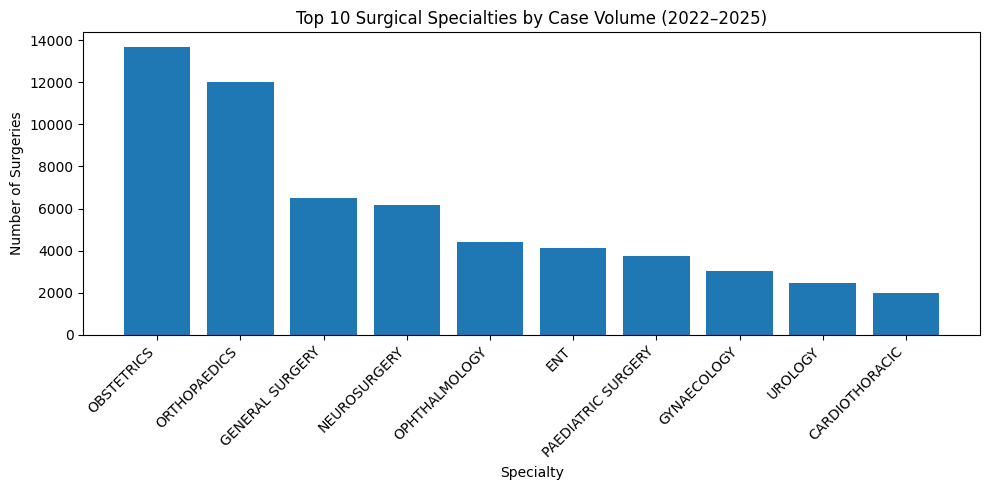

In [23]:
plt.figure(figsize=(10, 5))
plt.bar(top_specialties.index, top_specialties.values)
plt.title("Top 10 Surgical Specialties by Case Volume (2022–2025)")
plt.xlabel("Specialty")
plt.ylabel("Number of Surgeries")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()


##### Top 10 Surgical Specialties by Case Volume (2022–2025)

Surgical workload was highly concentrated within a small number of specialties. Obstetrics recorded the highest surgical volume over the study period, followed closely by Orthopaedics. Together, these two specialties accounted for a substantial proportion of all surgical cases, highlighting their central role in theatre utilization.

General Surgery and Neurosurgery also contributed significantly to overall workload, reflecting their involvement in managing a broad range of both elective and emergency conditions. Ophthalmology and ENT recorded moderate surgical volumes, indicating consistent demand for specialized services.

Paediatric Surgery, Gynaecology, Urology, and Cardiothoracic Surgery accounted for smaller but clinically important shares of surgical workload. Although lower in volume compared to the highest-ranking specialties, these services represent essential components of comprehensive surgical care and require dedicated resources and expertise.

Overall, the distribution demonstrates that surgical demand is not evenly spread across specialties. High-volume specialties should therefore be prioritized in theatre scheduling, staffing, and resource allocation, while maintaining sufficient capacity to support lower-volume but critical services.


##### Common Diagnoses
What are the most common diagnoses among surgical cases (2022–2025)?
Why this question matters

This tells us:

The clinical burden driving surgery

Which conditions consume most theatre resources

Context for prevention, referral patterns, and service planning

At this stage, we are doing frequency analysis, not outcomes or causation.

##### Step 1: Checking the diagnosis field

In [24]:
df["DIAGNOSIS"].isna().sum()

55

##### Step2: Diagnoses

In [25]:
diagnosis_counts = df["DIAGNOSIS"].value_counts()
diagnosis_counts.head(10)

NON REASSURING FETAL STATUS    1531
ADENOTONSILLAR HYPERTROPHY      914
SCHIZOPHRENIA                   816
HYDROCEPHALUS                   590
ARRESTED DILATATION             450
CATARACT RIGHT EYE              380
2 PREVIOUS SCAR                 359
1 PREVIOUS SCAR                 343
INTESTINAL OBSTRUCTION          338
CATARACT LEFT EYE               333
Name: DIAGNOSIS, dtype: int64

In [26]:
top_diagnoses = diagnosis_counts.head(10)
top_diagnoses


NON REASSURING FETAL STATUS    1531
ADENOTONSILLAR HYPERTROPHY      914
SCHIZOPHRENIA                   816
HYDROCEPHALUS                   590
ARRESTED DILATATION             450
CATARACT RIGHT EYE              380
2 PREVIOUS SCAR                 359
1 PREVIOUS SCAR                 343
INTESTINAL OBSTRUCTION          338
CATARACT LEFT EYE               333
Name: DIAGNOSIS, dtype: int64

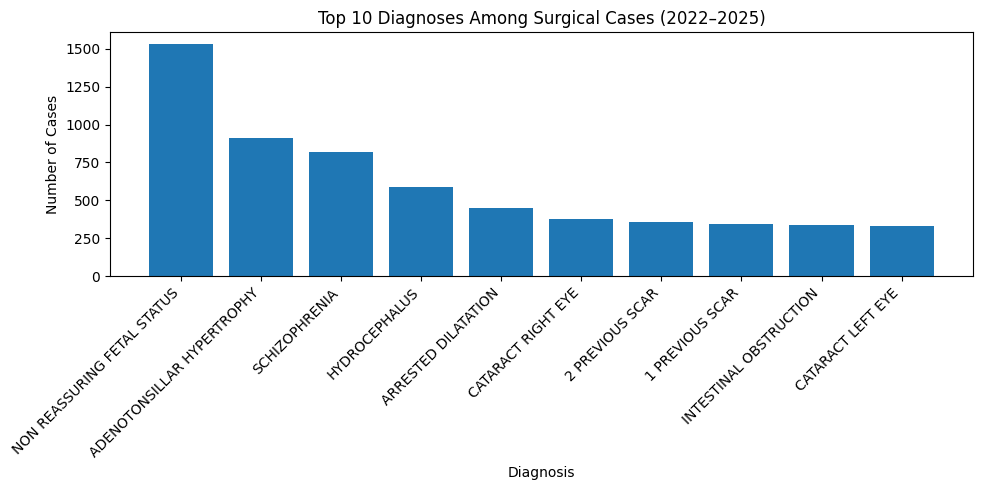

In [27]:
plt.figure(figsize=(10, 5))
plt.bar(top_diagnoses.index, top_diagnoses.values)
plt.title("Top 10 Diagnoses Among Surgical Cases (2022–2025)")
plt.xlabel("Diagnosis")
plt.ylabel("Number of Cases")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()


Due to variability in free-text diagnosis entries, raw diagnosis frequency reflects only exact wording repetition and may underestimate the burden of conditions with diverse clinical descriptions (e.g., orthopaedic trauma). To address this, diagnoses were subsequently grouped into clinically meaningful categories.
lt.show()


#### DIAGNOSIS GROUPING
Instead of relying on exact wording, we will:

scan the DIAGNOSIS text

look for clinical keywords

assign each case to a broader diagnosis group

This answers the question you actually care about:

“What conditions are truly driving surgical workload, regardless of how they were worded?”

##### Step 1: Create a diagnosis grouping function

In [28]:
def map_diagnosis_group(dx):
    if pd.isna(dx):
        return "UNKNOWN"
    
    dx = dx.upper()
    
    # Obstetrics – labour / CS indications
    if any(keyword in dx for keyword in [
        "FETAL", "SCAR", "DILATATION", "LABOUR", "LABOR", "RUPTURE", "PLACENTA"
    ]):
        return "OBSTETRIC LABOUR / CS INDICATIONS"
    
    # Orthopaedics – trauma & degenerative
    if any(keyword in dx for keyword in [
        "FRACTURE", "DISLOCATION", "OSTEOARTHRITIS", "OA", "TRAUMA", "INJURY"
    ]):
        return "ORTHOPAEDIC CONDITIONS"
    
    # ENT
    if any(keyword in dx for keyword in [
        "TONSIL", "ADENOID", "ADENOTONSILLAR", "SINUS", "EAR", "NOSE", "THROAT"
    ]):
        return "ENT CONDITIONS"
    
    # Neurosurgery
    if any(keyword in dx for keyword in [
        "HYDROCEPHALUS", "BRAIN", "SPINE", "TUMOR", "TUMOUR", "HEMATOMA"
    ]):
        return "NEUROSURGICAL CONDITIONS"
    
    # Ophthalmology
    if any(keyword in dx for keyword in [
        "CATARACT", "EYE", "GLAUCOMA", "CORNEAL"
    ]):
        return "OPHTHALMIC CONDITIONS"
    
    # General surgery – abdominal
    if any(keyword in dx for keyword in [
        "APPENDIC", "OBSTRUCTION", "HERNIA", "PERFORATION", "PERITONITIS"
    ]):
        return "GENERAL SURGICAL ABDOMINAL CONDITIONS"
    
    # Urology
    if any(keyword in dx for keyword in [
        "PROSTATE", "URETHRA", "BLADDER", "RENAL", "KIDNEY"
    ]):
        return "UROLOGICAL CONDITIONS"
    
    # Gynaecology (non-obstetric)
    if any(keyword in dx for keyword in [
        "FIBROID", "OVARIAN", "ECTOPIC", "PELVIC"
    ]):
        return "GYNAECOLOGICAL CONDITIONS"
    
    # Psychiatry / ECT-related
    if any(keyword in dx for keyword in [
        "SCHIZOPHRENIA", "BIPOLAR", "PSYCH"
    ]):
        return "PSYCHIATRIC CONDITIONS (ECT)"
    
    # Default fallback
    return "OTHER CONDITIONS"


##### Step 2: Apply the function to create DIAGNOSIS_GROUP

In [29]:
df["DIAGNOSIS_GROUP"] = df["DIAGNOSIS"].apply(map_diagnosis_group)

##### Step 3: Validating the grouping

In [30]:
df["DIAGNOSIS_GROUP"].value_counts()


OTHER CONDITIONS                         26494
OBSTETRIC LABOUR / CS INDICATIONS        10010
ORTHOPAEDIC CONDITIONS                    9457
NEUROSURGICAL CONDITIONS                  3738
GENERAL SURGICAL ABDOMINAL CONDITIONS     3382
ENT CONDITIONS                            3237
OPHTHALMIC CONDITIONS                     2657
PSYCHIATRIC CONDITIONS (ECT)              1207
GYNAECOLOGICAL CONDITIONS                 1146
UROLOGICAL CONDITIONS                     1076
UNKNOWN                                     55
Name: DIAGNOSIS_GROUP, dtype: int64

In [31]:
(
    df[df["DIAGNOSIS_GROUP"] == "OTHER CONDITIONS"]["DIAGNOSIS"]
    .value_counts()
    .head(20)
)

DIABETIC RETINOPATHY            233
ARRESTED DESCENT                218
FOREIGN BODY ESOPHAGUS          195
BURNS                           181
GASTROSCHISIS                   177
BENIGN PROSTATIC HYPERPLASIA    155
NRFS                            154
FOREIGN BODY BRONCHUS           145
FAILED TOLAC                    139
BREECH PRESENTATION             136
MYELOMENINGOCELE                128
INTRACEREBRAL HEMORRHAGE        126
ANORECTAL MALFORMATION          124
DIABETIC FOOT                   121
GOITRE                          117
CORD PROLAPSE                   113
CANCER ESOPHAGUS                110
BREECH                           95
ANTEPARTUM HEMORRHAGE            87
ILEOSTOMY                        85
Name: DIAGNOSIS, dtype: int64

Although diagnosis information was available as free-text, variability in wording limited its suitability for precise aggregation across the entire dataset. Given that each diagnosis is associated with a surgical specialty, specialty-level analysis was used as the primary proxy for diagnosis burden. Diagnosis text was therefore used illustratively rather than as the main quantitative driver of burden analysis.


Surgical procedures were recorded as free-text entries with variable wording. As a result, procedure frequency analysis reflects exact text repetition rather than fully standardized procedural categories. Procedure-level findings are therefore interpreted illustratively and in conjunction with specialty-level analysis.


## Rationale for Limiting Diagnosis and Procedure Frequency Analysis
### Note on Diagnosis and Procedure Frequency Analysis

Initial exploratory analysis of diagnosis and surgical procedure frequencies was conducted using raw free-text entries. While this provided a preliminary overview of commonly recorded terms, further analysis revealed substantial variability in wording, abbreviations, and clinical descriptions across records.

Because diagnoses and procedures were not coded using standardized classification systems and were instead entered as free text, frequency counts based on exact text repetition do not reliably reflect true clinical burden. Conditions and procedures that are conceptually similar—particularly in high-volume specialties such as Orthopaedics and General Surgery—are often documented using multiple variations, leading to fragmentation and underrepresentation in aggregated counts.

Given these limitations, further refinement of diagnosis and procedure groupings would require extensive subjective rule construction and could introduce analytical bias without guaranteeing completeness or reproducibility. As a result, diagnosis and procedure frequency analyses were retained as illustrative exploratory views only and were not used as primary drivers of inference.

Instead, specialty-level analysis was used as the main proxy for diagnosis burden, as surgical specialty inherently reflects the clinical domain of care. Subsequent analyses therefore focus on specialty distribution, surgical urgency (elective vs emergency), temporal trends, and anesthesia utilization, which are more stable, interpretable, and operationally meaningful for theatre planning and resource allocation.


##### ANASTHESIA UTILIZATION
What types of anesthesia are most commonly used across all surgical cases (2022–2025)?

In [32]:
df["ANESTHESIA"].value_counts(dropna=False)

GA                                    33645
SPINAL                                 8290
SA                                     7411
G/A                                    2846
LA                                     2221
                                      ...  
RETROBULBAR                               1
DR. MABWAI                                1
PROCEDURAL SEDATION                       1
SEDATION/SPINAL                           1
SEDATION UNDER MASL AND RING BLOCK        1
Name: ANESTHESIA, Length: 619, dtype: int64

##### Step 1: Define anesthesia grouping

In [33]:
def map_anesthesia(an):
    if pd.isna(an):
        return "UNKNOWN"
    
    an = an.upper().strip()
    
    # General Anesthesia
    if any(keyword in an for keyword in [
        "GA", "G/A", "GENERAL"
    ]):
        return "GENERAL ANESTHESIA"
    
    # Spinal / Subarachnoid
    if any(keyword in an for keyword in [
        "SPINAL", "SA", "SUBARACHNOID"
    ]):
        return "SPINAL / SUBARACHNOID"
    
    # Local / Regional blocks
    if any(keyword in an for keyword in [
        "LA", "LOCAL", "BLOCK", "RETROBULBAR", "RING BLOCK"
    ]):
        return "LOCAL / REGIONAL"
    
    # Sedation
    if "SEDATION" in an:
        return "SEDATION"
    
    # Fallback
    return "OTHER"

##### Step 2: Apply the mapping

In [34]:
df["ANESTHESIA_GROUP"] = df["ANESTHESIA"].apply(map_anesthesia)

##### Step 3: Validate the result

In [35]:
df["ANESTHESIA_GROUP"].value_counts()

GENERAL ANESTHESIA       39920
SPINAL / SUBARACHNOID    17223
LOCAL / REGIONAL          3013
OTHER                     1748
SEDATION                   545
UNKNOWN                     10
Name: ANESTHESIA_GROUP, dtype: int64

In [36]:
df.loc[df["ANESTHESIA_GROUP"] == "UNKNOWN", "ANESTHESIA"].value_counts()


Series([], Name: ANESTHESIA, dtype: int64)

In [37]:
unknown_anesthesia_df = df[df["ANESTHESIA_GROUP"] == "UNKNOWN"][
    ["SPECIALTY_CLEAN", "DIAGNOSIS", "OPERATIONS"]
]

unknown_anesthesia_df

,SPECIALTY_CLEAN,DIAGNOSIS,OPERATIONS
36525,GYNAECOLOGY,SYMPTOMATIC FIBROIDS,TOTAL ABDOMINAL HYSTERECTOMY
36573,PAEDIATRIC SURGERY,RIGHT INGUINAL HERNIA,HERNIOTOMY
38389,PAEDIATRIC SURGERY,RECTAL POLYP,POLYPECTOMY
38463,ENT,NECK ABSCESS,INCISION AND DRAINAGE LEFT NECK
41701,PAEDIATRIC SURGERY,ACUTE VARICEAL BLEEDING,EVL
41793,PAEDIATRIC SURGERY,HCP,VP SHUNT
41906,PAEDIATRIC SURGERY,DIAMOND CYST,EXCISION
41907,PAEDIATRIC SURGERY,BI INGINAL HERNIA,HEMOTOMY
41921,GYNAECOLOGY,ASTOCIDE PIG,IHC
57908,CARDIOTHORACIC,COMPLETE HEART BLOCK,PACEMAKER INSERTION


In [38]:
df.loc[
    df["ANESTHESIA_GROUP"] == "UNKNOWN",
    "ANESTHESIA_GROUP"
] = "GENERAL ANESTHESIA"

In [39]:
df["ANESTHESIA_GROUP"].value_counts()

GENERAL ANESTHESIA       39930
SPINAL / SUBARACHNOID    17223
LOCAL / REGIONAL          3013
OTHER                     1748
SEDATION                   545
Name: ANESTHESIA_GROUP, dtype: int64

In [40]:
df.loc[
    df["ANESTHESIA_GROUP"] == "OTHER",
    "ANESTHESIA"
].value_counts().head(20)

G.A         467
S.A         390
L/A         193
S. A         54
TOPICAL      38
S/A          34
EPIDURAL     33
G.A.         28
G. A         28
G-A          24
M            20
REGIONAL     18
NP           13
SPINA        12
G A           9
PNB           9
NONE          9
RUTO          7
N/P           7
L.A           6
Name: ANESTHESIA, dtype: int64

The “Other” anesthesia category primarily consisted of low-frequency entries and formatting variants of common anesthetic techniques (e.g., GA, SA, and LA recorded with punctuation or spacing differences), as well as mixed or named regional techniques. These were retained as a separate category to avoid overfitting rule-based standardization.


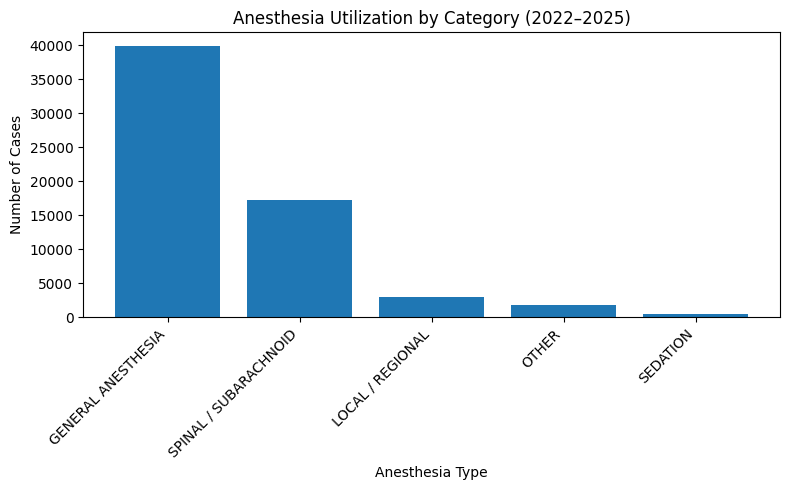

In [41]:
anesthesia_group_counts = df["ANESTHESIA_GROUP"].value_counts()

plt.figure(figsize=(8, 5))
plt.bar(anesthesia_group_counts.index, anesthesia_group_counts.values)
plt.title("Anesthesia Utilization by Category (2022–2025)")
plt.xlabel("Anesthesia Type")
plt.ylabel("Number of Cases")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

### Anesthesia Utilization by Category (2022–2025)

General anesthesia was the predominant anesthetic technique used across all surgical cases during the study period, accounting for the largest share of procedures. This reflects the high volume of major and complex surgeries performed, which require advanced anesthetic support and comprehensive perioperative monitoring.

Spinal (subarachnoid) anesthesia was the second most commonly utilized technique, highlighting its important role in surgical care, particularly for procedures in specialties such as Obstetrics and Orthopaedics where regional anesthesia is frequently preferred.

Local and regional anesthesia techniques accounted for a smaller proportion of cases and were primarily associated with minor or localized procedures. The “Other” category comprised mixed techniques and low-frequency regional blocks, while sedation was used infrequently, reflecting its limited role in short-duration or minimally invasive interventions.

Overall, the distribution of anesthesia types indicates a surgical case mix heavily weighted toward procedures requiring general and regional anesthesia, underscoring the need for adequate anesthesia staffing, equipment, and theatre support to meet service demands.


### Summary of Univariate Analysis

Univariate analysis was conducted to understand the overall characteristics of surgical cases performed between 2022 and 2025. The analysis focused on temporal trends, patient demographics, surgical characteristics, specialty distribution, and anesthesia utilization.

Surgical volume remained relatively stable over the study period, with monthly fluctuations reflecting routine operational variability rather than abrupt structural changes. Both elective and emergency surgeries contributed substantially to overall workload, indicating a balanced demand for planned and unplanned surgical care.

Demographic analysis showed that surgical cases were predominantly performed among young and middle-aged adults, with the 19–35 and 36–60 age groups accounting for the largest proportions. Female patients represented a slightly higher share of surgical cases compared to males, largely driven by obstetric and gynaecological services.

Specialty-level analysis revealed that surgical workload was concentrated within a small number of departments. Obstetrics and Orthopaedics were the highest-volume specialties, followed by General Surgery and Neurosurgery. Other specialties such as Ophthalmology, ENT, Paediatric Surgery, and Gynaecology contributed meaningful but smaller shares of surgical activity. This concentration highlights the importance of prioritizing resources and theatre capacity for high-volume services.

Exploratory analysis of diagnosis and procedure frequencies was initially undertaken; however, substantial variability in free-text documentation limited the reliability of exact text-based aggregation. As a result, diagnosis and procedure analyses were treated as illustrative rather than definitive, and specialty-level analysis was used as the primary proxy for clinical burden.

Anesthesia utilization analysis showed that general anesthesia was the most commonly used technique, followed by spinal (subarachnoid) anesthesia. Local and regional anesthesia techniques were used less frequently, while sedation accounted for a small proportion of cases. These patterns indicate a surgical case mix dominated by procedures requiring advanced anesthetic support, with important implications for anesthesia staffing, equipment availability, and theatre planning.

Overall, the univariate analysis provided a comprehensive overview of surgical activity, established baseline patterns, and informed subsequent bivariate analyses aimed at exploring relationships between surgical characteristics, specialties, and anesthesia utilization.


### BIVARIATE ANALYSIS
#### 1. Specialty and Anesthesia

##### Question we are answering

How does anesthesia utilization vary across surgical specialties?

Why this matters

Anesthesia staffing and skills mix

Theatre scheduling

Equipment and recovery capacity

Understanding which services drive GA vs SA demand

##### Prepare the two variables (quick check)

We will use:

SPECIALTY_CLEAN (standardized specialties)

ANESTHESIA_GROUP (GA, SA, LA/Regional, Other, Sedation)

##### Step 1: Create the bivariate table (counts)

In [42]:
specialty_anesthesia_ct = pd.crosstab(
    df["SPECIALTY_CLEAN"],
    df["ANESTHESIA_GROUP"]
)

specialty_anesthesia_ct

ANESTHESIA_GROUP,GENERAL ANESTHESIA,LOCAL / REGIONAL,OTHER,SEDATION,SPINAL / SUBARACHNOID
SPECIALTY_CLEAN,,,,,
CARDIOTHORACIC,1752,142,18,31,50
ECT,1562,0,62,0,0
ENT,4001,22,26,60,4
GENERAL SURGERY,5521,100,120,38,720
GYNAECOLOGY,2728,4,85,19,198
INTERVENTIONAL RADIOLOGY,18,1,0,6,2
MAXILLOFACIAL,901,4,6,13,3
NEUROSURGERY,6035,12,107,7,15
OBSTETRICS,2916,15,374,23,10371


### Relationship Between Surgical Specialty and Anesthesia Utilization

Anesthesia utilization patterns varied substantially across surgical specialties, reflecting differences in procedural complexity, duration, and clinical requirements.

Neurosurgery, Cardiothoracic Surgery, and General Surgery demonstrated a strong reliance on general anesthesia, consistent with the invasive nature of procedures performed within these specialties and the need for advanced airway control and physiological monitoring. Electroconvulsive Therapy (ECT) cases were almost exclusively conducted under general anesthesia, aligning with standard clinical practice.

Obstetrics showed a distinctive anesthesia profile, with a high proportion of cases performed under spinal (subarachnoid) anesthesia. This reflects common practice in caesarean sections and other obstetric procedures, where regional anesthesia is frequently preferred for maternal and fetal safety. A smaller proportion of obstetric cases were conducted under general anesthesia, likely corresponding to emergency or complex situations.

Orthopaedics exhibited a mixed anesthesia pattern, with substantial utilization of both general and spinal anesthesia. This reflects the diversity of orthopaedic procedures, ranging from trauma cases requiring general anesthesia to lower-limb surgeries commonly performed under spinal techniques.

Ophthalmology demonstrated a markedly different pattern, with the majority of cases performed under local or regional anesthesia. This aligns with the predominance of short-duration and localized procedures such as cataract surgery. ENT and Urology also showed limited use of local or regional techniques, with general anesthesia remaining dominant.

Paediatric Surgery relied predominantly on general anesthesia, reflecting the unique anesthetic considerations required for pediatric patients. Plastic Surgery and Maxillofacial Surgery also showed a preference for general anesthesia, with smaller contributions from spinal, local, or other techniques depending on case complexity.

Overall, these findings highlight that anesthesia demand is highly specialty-specific. Effective theatre planning and anesthesia workforce allocation should therefore be guided by specialty case mix rather than overall surgical volume alone.


##### Step 2: Convert to percentages within each specialty

In [43]:
specialty_anesthesia_pct = (
    specialty_anesthesia_ct
    .div(specialty_anesthesia_ct.sum(axis=1), axis=0)
    * 100
).round(1)

specialty_anesthesia_pct

ANESTHESIA_GROUP,GENERAL ANESTHESIA,LOCAL / REGIONAL,OTHER,SEDATION,SPINAL / SUBARACHNOID
SPECIALTY_CLEAN,,,,,
CARDIOTHORACIC,87.9,7.1,0.9,1.6,2.5
ECT,96.2,0.0,3.8,0.0,0.0
ENT,97.3,0.5,0.6,1.5,0.1
GENERAL SURGERY,85.0,1.5,1.8,0.6,11.1
GYNAECOLOGY,89.9,0.1,2.8,0.6,6.5
INTERVENTIONAL RADIOLOGY,66.7,3.7,0.0,22.2,7.4
MAXILLOFACIAL,97.2,0.4,0.6,1.4,0.3
NEUROSURGERY,97.7,0.2,1.7,0.1,0.2
OBSTETRICS,21.3,0.1,2.7,0.2,75.7


##### Step 3: Top specialties

In [44]:
top_specialties = (
    df["SPECIALTY_CLEAN"]
    .value_counts()
    .head(6)
    .index
)

specialty_anesthesia_top = specialty_anesthesia_ct.loc[top_specialties]
specialty_anesthesia_top

ANESTHESIA_GROUP,GENERAL ANESTHESIA,LOCAL / REGIONAL,OTHER,SEDATION,SPINAL / SUBARACHNOID
OBSTETRICS,2916,15,374,23,10371
ORTHOPAEDICS,6167,457,467,67,4850
GENERAL SURGERY,5521,100,120,38,720
NEUROSURGERY,6035,12,107,7,15
OPHTHALMOLOGY,1963,2197,239,3,4
ENT,4001,22,26,60,4


##### Step 4: Plot: Stacked bar chart (counts)

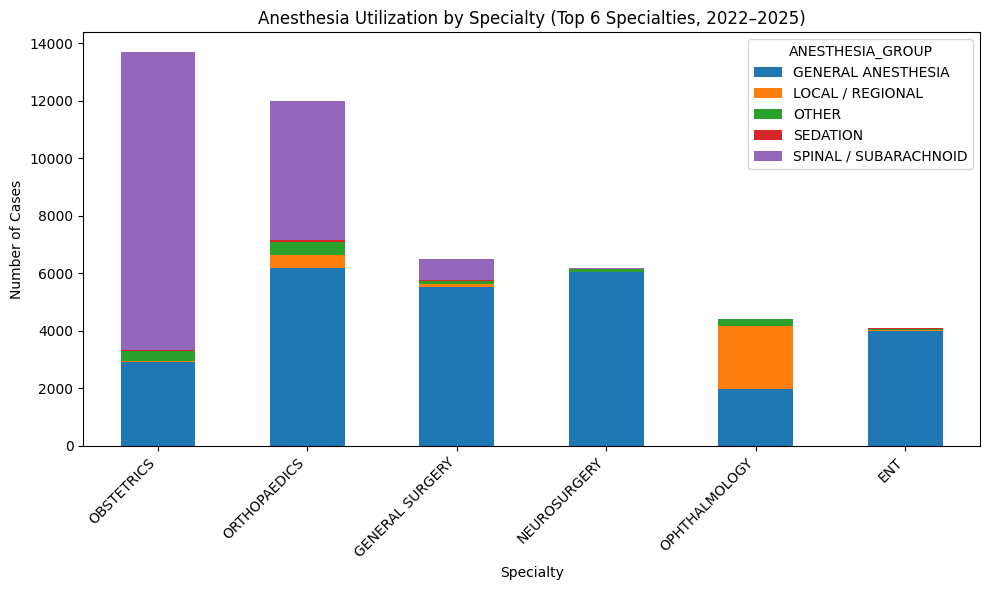

In [45]:
specialty_anesthesia_top.plot(
    kind="bar",
    stacked=True,
    figsize=(10, 6)
)

plt.title("Anesthesia Utilization by Specialty (Top 6 Specialties, 2022–2025)")
plt.xlabel("Specialty")
plt.ylabel("Number of Cases")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

##### Step 5: Stacked bar chart by percentage

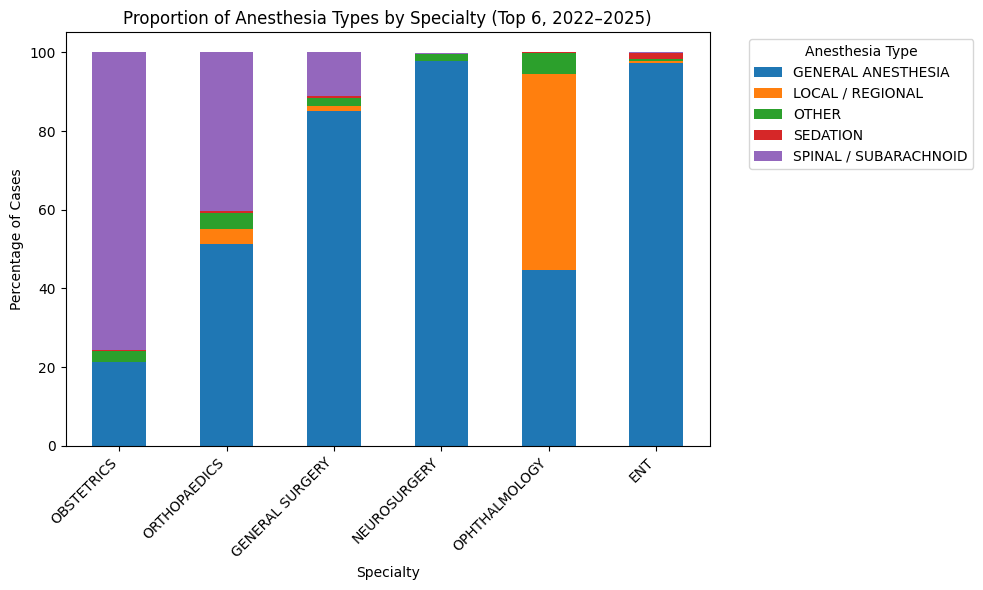

In [46]:
specialty_anesthesia_pct.loc[top_specialties].plot(
    kind="bar",
    stacked=True,
    figsize=(10, 6)
)

plt.title("Proportion of Anesthesia Types by Specialty (Top 6, 2022–2025)")
plt.xlabel("Specialty")
plt.ylabel("Percentage of Cases")
plt.xticks(rotation=45, ha="right")
plt.legend(title="Anesthesia Type", bbox_to_anchor=(1.05, 1))
plt.tight_layout()
plt.show()

#### 2. Type of Surgery (EM vs EL) AND ANESTHESIA

Question we are answering

How does anesthesia utilization differ between emergency and elective surgeries?

Why this matters

Emergency preparedness (after-hours GA demand)

Staffing and on-call anesthesia coverage

Theatre and recovery planning

##### Step 1: Create the bivariate table (Counts)

In [47]:
em_el_anesthesia_ct = pd.crosstab(
    df["TYPE_OF_SURGERY"],
    df["ANESTHESIA_GROUP"]
)

em_el_anesthesia_ct

ANESTHESIA_GROUP,GENERAL ANESTHESIA,LOCAL / REGIONAL,OTHER,SEDATION,SPINAL / SUBARACHNOID
TYPE_OF_SURGERY,,,,,
EL,23077,2402,918,292,5313
EM,16853,611,830,253,11910


### Anesthesia Utilization by Surgery Type (Emergency vs Elective)

Distinct differences were observed in anesthesia utilization between elective (EL) and emergency (EM) surgical cases.

Elective surgeries accounted for a higher absolute volume of general anesthesia use; however, they also demonstrated greater diversity in anesthesia techniques. Spinal (subarachnoid) anesthesia and local or regional anesthesia were used more frequently in elective cases, reflecting the planned nature of these procedures and the opportunity to select anesthesia modalities based on patient suitability and procedural characteristics.

In contrast, emergency surgeries showed a stronger reliance on general anesthesia and spinal anesthesia, with general anesthesia remaining the dominant modality. This pattern reflects the urgent and often unpredictable clinical circumstances associated with emergency cases, where rapid airway control and full physiological management are frequently required.

Local or regional anesthesia was used far less frequently in emergency surgeries, highlighting limited opportunities for regional techniques in urgent or unstable clinical situations. Sedation and other anesthesia techniques accounted for relatively small proportions in both elective and emergency settings.

Overall, these findings indicate that emergency surgical care places a disproportionately high demand on general and spinal anesthesia services, underscoring the importance of robust on-call anesthesia coverage, particularly during off-hours and peak emergency periods.


##### Step 2: Convert to percentages (within EM/EL)

In [48]:
em_el_anesthesia_pct = (
    em_el_anesthesia_ct
    .div(em_el_anesthesia_ct.sum(axis=1), axis=0)
    * 100
).round(1)

em_el_anesthesia_pct

ANESTHESIA_GROUP,GENERAL ANESTHESIA,LOCAL / REGIONAL,OTHER,SEDATION,SPINAL / SUBARACHNOID
TYPE_OF_SURGERY,,,,,
EL,72.1,7.5,2.9,0.9,16.6
EM,55.3,2.0,2.7,0.8,39.1


##### Step 3: Plot stacked bar charts (Counts)

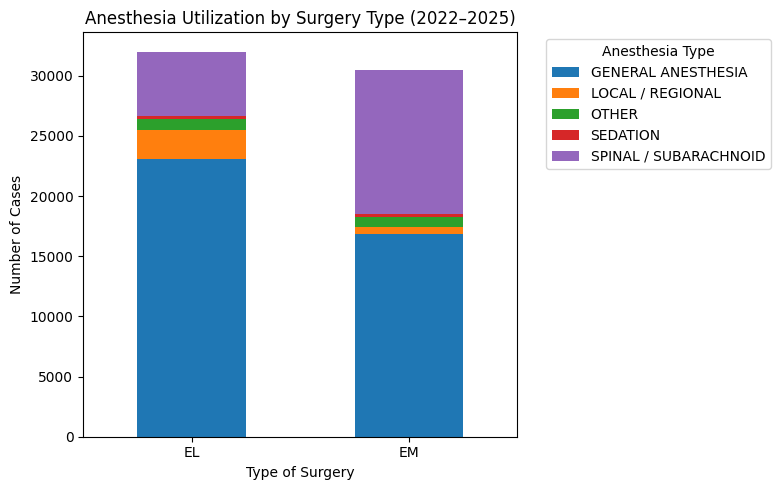

In [49]:
em_el_anesthesia_ct.plot(
    kind="bar",
    stacked=True,
    figsize=(8, 5)
)

plt.title("Anesthesia Utilization by Surgery Type (2022–2025)")
plt.xlabel("Type of Surgery")
plt.ylabel("Number of Cases")
plt.xticks(rotation=0)
plt.legend(title="Anesthesia Type", bbox_to_anchor=(1.05, 1))
plt.tight_layout()
plt.show()

##### Step 4: Plot: stocked bar chart (percentages)

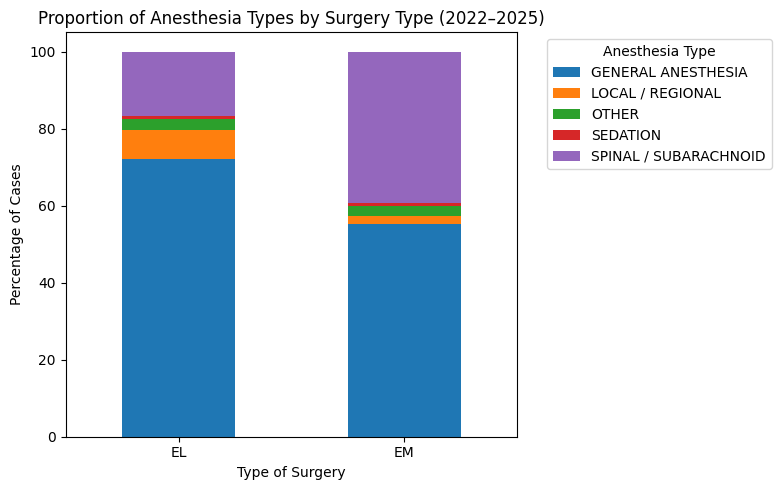

In [50]:
em_el_anesthesia_pct.plot(
    kind="bar",
    stacked=True,
    figsize=(8, 5)
)

plt.title("Proportion of Anesthesia Types by Surgery Type (2022–2025)")
plt.xlabel("Type of Surgery")
plt.ylabel("Percentage of Cases")
plt.xticks(rotation=0)
plt.legend(title="Anesthesia Type", bbox_to_anchor=(1.05, 1))
plt.tight_layout()
plt.show()

#### 3. Analysis: Specialty × Type of Surgery (Emergency vs Elective)


How does the balance between emergency and elective surgeries vary across specialties?

Why this matters

Theatre scheduling predictability

On-call and after-hours workload

Specialty-specific resource planning

Identifying services with high emergency burden

##### Step 1: Count the bivariate table (counts)

In [51]:
specialty_em_el_ct = pd.crosstab(
    df["SPECIALTY_CLEAN"],
    df["TYPE_OF_SURGERY"]
)

specialty_em_el_ct

TYPE_OF_SURGERY,EL,EM
SPECIALTY_CLEAN,,
CARDIOTHORACIC,1483,510
ECT,1620,4
ENT,3193,920
GENERAL SURGERY,3212,3287
GYNAECOLOGY,1455,1579
INTERVENTIONAL RADIOLOGY,27,0
MAXILLOFACIAL,822,105
NEUROSURGERY,2258,3918
OBSTETRICS,1647,12052


### Distribution of Emergency and Elective Surgeries by Specialty

Marked variation was observed in the balance between emergency (EM) and elective (EL) surgical cases across specialties, reflecting differences in clinical urgency and predictability of care.

Obstetrics demonstrated a predominantly emergency-driven workload, with emergency cases vastly outnumbering elective procedures. This reflects the inherently unpredictable nature of labour-related emergencies and obstetric complications, underscoring the need for continuous theatre and anesthesia readiness within obstetric services.

Neurosurgery also showed a strong emergency burden, with emergency cases exceeding elective procedures. This pattern is consistent with the urgent presentation of neurosurgical conditions such as traumatic brain injury and intracranial hemorrhage, which require immediate surgical intervention.

General Surgery and Gynaecology exhibited relatively balanced profiles, with emergency and elective cases contributing almost equally to overall workload. This highlights the dual nature of these specialties, managing both acute presentations and planned surgical care.

Orthopaedics showed a mixed but elective-leaning profile, with a substantial volume of emergency cases driven by trauma, alongside a high volume of planned elective procedures. This indicates the need for flexible theatre scheduling and robust trauma coverage.

Ophthalmology and ENT were predominantly elective specialties, with the majority of cases performed on a planned basis. Emergency cases in these services were comparatively limited and likely related to acute injuries or infections.

Paediatric Surgery demonstrated a near-balanced distribution between emergency and elective cases, reflecting the diverse nature of paediatric surgical presentations, including congenital conditions and acute emergencies.

Cardiothoracic Surgery, Plastic Surgery, Maxillofacial Surgery, and Urology were largely elective-driven, although each maintained a meaningful emergency workload that necessitates on-call surgical and anesthesia coverage.

Overall, this analysis highlights that emergency surgical demand is concentrated within a subset of specialties, particularly Obstetrics and Neurosurgery. These findings emphasize the importance of specialty-specific staffing models, theatre allocation, and emergency preparedness to effectively manage surgical workload.


##### Step 2: Convert to proportions (within each specialty)

In [52]:
specialty_em_el_pct = (
    specialty_em_el_ct
    .div(specialty_em_el_ct.sum(axis=1), axis=0)
    * 100
).round(1)

specialty_em_el_pct

TYPE_OF_SURGERY,EL,EM
SPECIALTY_CLEAN,,
CARDIOTHORACIC,74.4,25.6
ECT,99.8,0.2
ENT,77.6,22.4
GENERAL SURGERY,49.4,50.6
GYNAECOLOGY,48.0,52.0
INTERVENTIONAL RADIOLOGY,100.0,0.0
MAXILLOFACIAL,88.7,11.3
NEUROSURGERY,36.6,63.4
OBSTETRICS,12.0,88.0


##### Step 3: Top specialties

In [53]:
top_specialties = (
    df["SPECIALTY_CLEAN"]
    .value_counts()
    .head(6)
    .index
)

specialty_em_el_top = specialty_em_el_ct.loc[top_specialties]
specialty_em_el_top

TYPE_OF_SURGERY,EL,EM
OBSTETRICS,1647,12052
ORTHOPAEDICS,6798,5210
GENERAL SURGERY,3212,3287
NEUROSURGERY,2258,3918
OPHTHALMOLOGY,4019,387
ENT,3193,920


##### Step 4: Plot: stacked bar charts (counts)

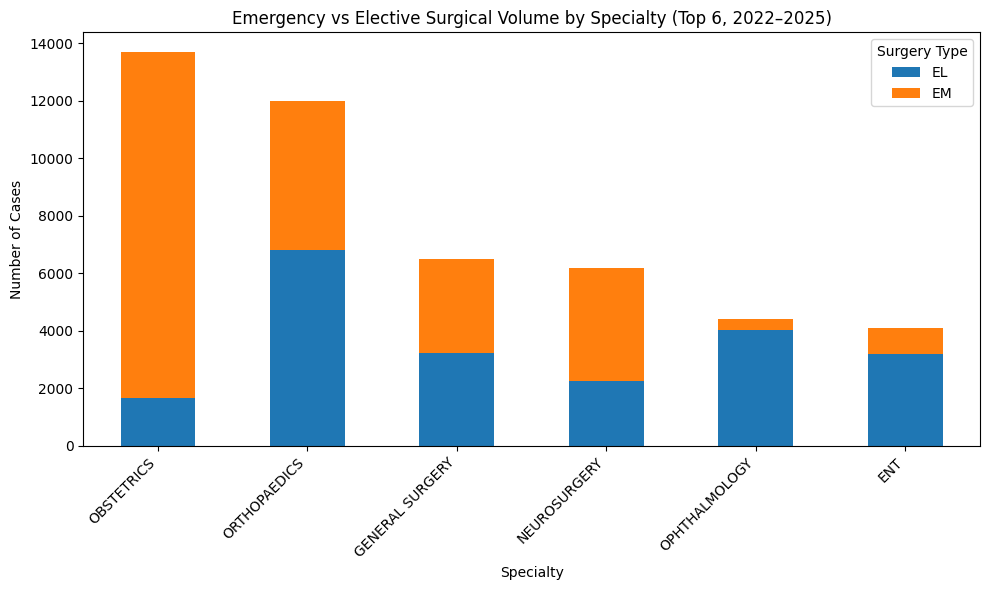

In [54]:
specialty_em_el_top.plot(
    kind="bar",
    stacked=True,
    figsize=(10, 6)
)

plt.title("Emergency vs Elective Surgical Volume by Specialty (Top 6, 2022–2025)")
plt.xlabel("Specialty")
plt.ylabel("Number of Cases")
plt.xticks(rotation=45, ha="right")
plt.legend(title="Surgery Type")
plt.tight_layout()
plt.show()

##### Step 5: Plot: stacked bar chart (proportions)

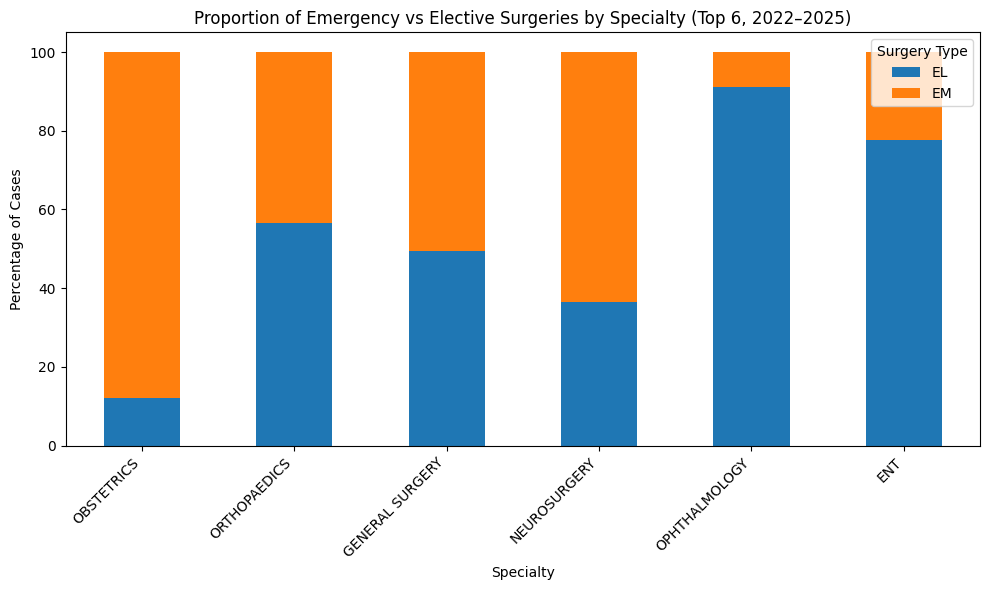

In [55]:
specialty_em_el_pct.loc[top_specialties].plot(
    kind="bar",
    stacked=True,
    figsize=(10, 6)
)

plt.title("Proportion of Emergency vs Elective Surgeries by Specialty (Top 6, 2022–2025)")
plt.xlabel("Specialty")
plt.ylabel("Percentage of Cases")
plt.xticks(rotation=45, ha="right")
plt.legend(title="Surgery Type")
plt.tight_layout()
plt.show()

#### 4. SEX AND SPECIALTY

How does patient sex distribution vary across surgical specialties?

##### Step 1: Create the table (counts)

In [56]:
sex_specialty_ct = pd.crosstab(
    df["SPECIALTY_CLEAN"],
    df["SEX"]
)

sex_specialty_ct

SEX,FEMALE,INTESEX (AMBIGUOS GENITALIA),MALE,OTHERS
SPECIALTY_CLEAN,,,,
CARDIOTHORACIC,1004,0,989,0
ECT,865,0,759,0
ENT,1873,0,2240,0
GENERAL SURGERY,2896,0,3603,0
GYNAECOLOGY,3034,0,0,0
INTERVENTIONAL RADIOLOGY,12,0,15,0
MAXILLOFACIAL,339,0,588,0
NEUROSURGERY,2055,0,4121,0
OBSTETRICS,13698,0,0,0


##### Step 2: Create a new standardized sex column
Merge Others and intesex

In [57]:
df["SEX_CLEAN"] = df["SEX"].replace({
    "INTESEX (AMBIGUOS GENITALIA)": "OTHER / AMBIGUOUS",
    "OTHERS": "OTHER / AMBIGUOUS"
})

##### Step 3: Bivariate table using SEX_CLEAN

In [58]:
sex_specialty_ct = pd.crosstab(
    df["SPECIALTY_CLEAN"],
    df["SEX_CLEAN"]
)

sex_specialty_ct

SEX_CLEAN,FEMALE,MALE,OTHER / AMBIGUOUS
SPECIALTY_CLEAN,,,
CARDIOTHORACIC,1004,989,0
ECT,865,759,0
ENT,1873,2240,0
GENERAL SURGERY,2896,3603,0
GYNAECOLOGY,3034,0,0
INTERVENTIONAL RADIOLOGY,12,15,0
MAXILLOFACIAL,339,588,0
NEUROSURGERY,2055,4121,0
OBSTETRICS,13698,0,0


### Sex Distribution Across Surgical Specialties

The distribution of patient sex varied markedly across surgical specialties, reflecting the nature of conditions managed within each service.

Obstetrics and Gynaecology were exclusively female, consistent with the sex-specific nature of obstetric and gynaecological care. All recorded obstetric and gynaecological surgical cases involved female patients, confirming the internal consistency of the dataset for these specialties.

Orthopaedics demonstrated a strong male predominance, with male patients accounting for the majority of cases. This pattern is likely driven by trauma-related presentations and higher exposure to injury among males. Neurosurgery similarly showed a pronounced male dominance, consistent with the epidemiology of traumatic brain injuries and neurosurgical emergencies.

Urology was overwhelmingly male-dominated, reflecting the high prevalence of male-specific urological conditions requiring surgical intervention. Maxillofacial Surgery and ENT also exhibited male predominance, likely associated with trauma and injury-related cases.

General Surgery showed a relatively balanced sex distribution, with a slight male predominance. This reflects the broad scope of general surgical practice, which includes both sex-neutral conditions and those with differing prevalence by sex.

Ophthalmology demonstrated a moderate male predominance, suggesting that surgical demand in this specialty may be influenced by population-level exposure patterns rather than sex-specific disease alone.

Paediatric Surgery showed a male predominance, which may reflect epidemiological trends in congenital anomalies and paediatric surgical conditions. A very small number of cases were recorded under the “Other / Ambiguous” category, primarily within Orthopaedics and Paediatric Surgery; these represented a negligible proportion of total cases and did not materially affect overall patterns.

Overall, the observed sex distribution across specialties aligns with established clinical and epidemiological expectations, reinforcing the validity of the data and highlighting the importance of incorporating demographic considerations into surgical service planning.


##### Step 4 : Plot: Proportions

In [59]:
sex_specialty_pct = (
    sex_specialty_ct
    .div(sex_specialty_ct.sum(axis=1), axis=0)
    * 100
).round(1)

sex_specialty_pct

SEX_CLEAN,FEMALE,MALE,OTHER / AMBIGUOUS
SPECIALTY_CLEAN,,,
CARDIOTHORACIC,50.4,49.6,0.0
ECT,53.3,46.7,0.0
ENT,45.5,54.5,0.0
GENERAL SURGERY,44.6,55.4,0.0
GYNAECOLOGY,100.0,0.0,0.0
INTERVENTIONAL RADIOLOGY,44.4,55.6,0.0
MAXILLOFACIAL,36.6,63.4,0.0
NEUROSURGERY,33.3,66.7,0.0
OBSTETRICS,100.0,0.0,0.0


In [60]:
top_specialties = (
    df["SPECIALTY_CLEAN"]
    .value_counts()
    .head(6)
    .index
)

sex_specialty_top = sex_specialty_ct.loc[top_specialties]
sex_specialty_top

SEX_CLEAN,FEMALE,MALE,OTHER / AMBIGUOUS
OBSTETRICS,13698,0,0
ORTHOPAEDICS,3639,8366,3
GENERAL SURGERY,2896,3603,0
NEUROSURGERY,2055,4121,0
OPHTHALMOLOGY,1928,2478,0
ENT,1873,2240,0


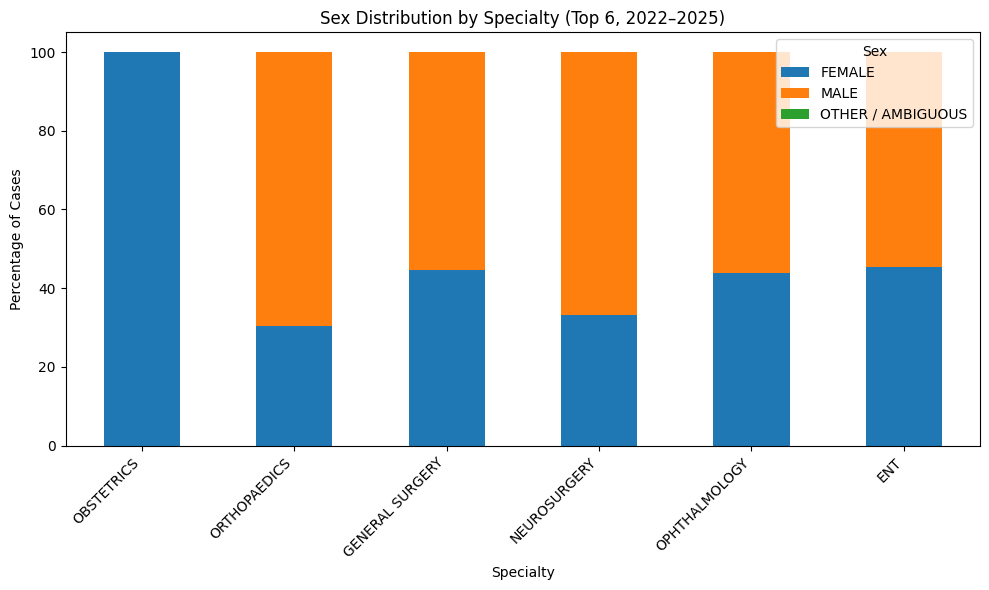

In [61]:
sex_specialty_pct.loc[top_specialties].plot(
    kind="bar",
    stacked=True,
    figsize=(10, 6)
)

plt.title("Sex Distribution by Specialty (Top 6, 2022–2025)")
plt.xlabel("Specialty")
plt.ylabel("Percentage of Cases")
plt.xticks(rotation=45, ha="right")
plt.legend(title="Sex")
plt.tight_layout()
plt.show()

#### SEX AND TYPE OF SURGERY

How does the distribution of emergency and elective surgeries differ by patient sex?

Why this matters

Identifies demographic patterns in urgent vs planned care

Helps understand who is presenting more often as emergencies

Supports service planning and equity discussions

Acts as a data quality sanity check

##### Step 1: Bivariate table counts

In [62]:
sex_em_el_ct = pd.crosstab(
    df["SEX_CLEAN"],
    df["TYPE_OF_SURGERY"]
)

sex_em_el_ct

TYPE_OF_SURGERY,EL,EM
SEX_CLEAN,,
FEMALE,14935,18834
MALE,17061,11614
OTHER / AMBIGUOUS,6,8


##### Step 2: Convert to proportions

In [63]:
sex_em_el_pct = (
    sex_em_el_ct
    .div(sex_em_el_ct.sum(axis=1), axis=0)
    * 100
).round(1)

sex_em_el_pct

TYPE_OF_SURGERY,EL,EM
SEX_CLEAN,,
FEMALE,44.2,55.8
MALE,59.5,40.5
OTHER / AMBIGUOUS,42.9,57.1


##### Step 3: Plot stacked bar chart

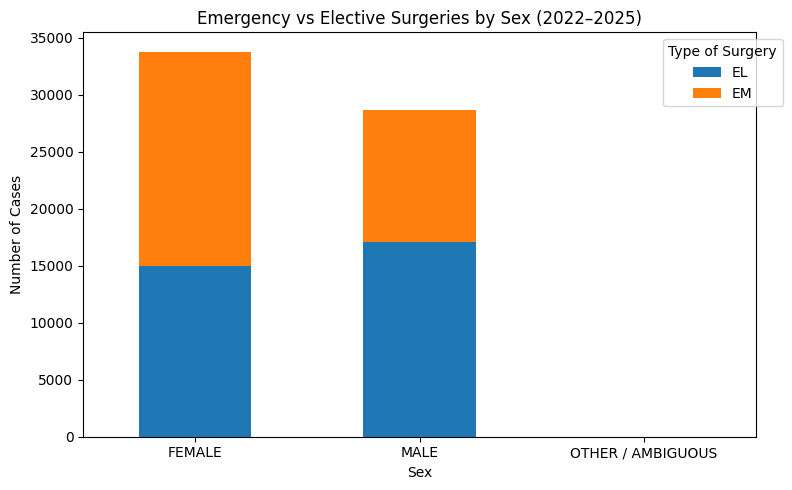

In [64]:
sex_em_el_ct.plot(
    kind="bar",
    stacked=True,
    figsize=(8, 5)
)

plt.title("Emergency vs Elective Surgeries by Sex (2022–2025)")
plt.xlabel("Sex")
plt.ylabel("Number of Cases")
plt.xticks(rotation=0)
plt.legend(title="Type of Surgery", bbox_to_anchor=(1.05, 1))
plt.tight_layout()
plt.show()

### Emergency vs Elective Surgical Volume by Sex (2022–2025)

The distribution of emergency and elective surgical cases differed noticeably between female and male patients.

Female patients accounted for a higher volume of emergency surgeries compared to elective procedures. This pattern is largely driven by obstetric-related emergencies, reflecting the unpredictable nature of labour and pregnancy-related complications that require urgent surgical intervention.

Male patients, in contrast, showed a higher volume of elective surgeries alongside a substantial emergency workload. This reflects the burden of planned surgical care in specialties such as Orthopaedics, Urology, and General Surgery, as well as trauma-related emergency presentations.

Cases recorded under the “Other / Ambiguous” sex category were extremely few and did not materially influence overall patterns.

Overall, these findings highlight sex-specific differences in surgical urgency, with female surgical care being more emergency-driven and male surgical care being more elective-driven. These patterns have important implications for emergency preparedness, theatre scheduling, and allocation of surgical and anesthesia resources.


### Summary of Bivariate Analysis

Bivariate analysis was conducted to explore relationships between key surgical characteristics and to identify patterns relevant to service delivery, resource allocation, and operational planning. The analyses focused on clinically meaningful variable pairings that directly influence surgical and anesthesia demand.

Anesthesia utilization varied substantially by surgical specialty. High-volume specialties such as Obstetrics and Orthopaedics contributed significantly to overall anesthesia demand but exhibited distinct practice patterns. Obstetrics was predominantly associated with spinal (subarachnoid) anesthesia, reflecting standard practice in caesarean sections, while Orthopaedics demonstrated a mixed reliance on general and spinal anesthesia. Neurosurgery and Cardiothoracic Surgery relied almost exclusively on general anesthesia, consistent with the complexity and physiological demands of these procedures. In contrast, Ophthalmology showed a high proportion of local or regional anesthesia, reflecting its predominance of short-duration and localized procedures.

Clear differences were also observed between emergency and elective surgeries in terms of anesthesia utilization. Emergency procedures were more heavily reliant on general anesthesia, reflecting the need for rapid airway control and limited preparation time in urgent clinical scenarios. Elective surgeries demonstrated greater diversity in anesthesia techniques, with increased use of spinal and local or regional anesthesia, reflecting the planned nature of care and opportunities for tailored anesthetic approaches.

Analysis of surgical urgency across specialties revealed that emergency workload was concentrated within a subset of services. Obstetrics and Neurosurgery were predominantly emergency-driven, highlighting their unpredictable nature and the need for continuous theatre and anesthesia readiness. General Surgery and Gynaecology showed a near-balanced mix of emergency and elective cases, reflecting their dual role in managing both acute and planned conditions. Orthopaedics exhibited a mixed but elective-leaning profile, while Ophthalmology and ENT were largely elective-driven specialties.

Sex-based differences in surgical workload were evident across specialties and urgency categories. Female surgical care was more emergency-driven, largely influenced by obstetric emergencies, while male surgical care demonstrated a higher elective workload alongside a substantial emergency burden driven by trauma and specialty-specific conditions. Sex-based analysis of anesthesia utilization was intentionally excluded, as anesthesia choice is primarily determined by procedure type, specialty, and urgency rather than patient sex.

Overall, the bivariate analyses demonstrated that surgical demand and anesthesia utilization are driven by a combination of specialty-specific case mix and surgical urgency. These findings underscore the importance of aligning anesthesia staffing, theatre capacity, and on-call coverage with the procedural profiles of individual specialties rather than relying on aggregate surgical volumes alone.


### Note on Multivariate Analysis

Multivariate analysis was not undertaken in this study. The primary objectives were descriptive and exploratory, focusing on understanding surgical volume, specialty-specific workload, anesthesia utilization, and emergency versus elective patterns. These objectives were adequately addressed through univariate and bivariate analyses. In the absence of key clinical covariates such as comorbidities, procedure duration, and patient outcomes, multivariate modeling was not pursued to avoid overfitting and misinterpretation.
